## Assaig de tracció

A un assaig de tracció, una proveta normalitzada amb una secció $s$ es somet a un força $F$ de tracció. La **tensió normal** o **esforç** $\sigma$ generat per la força $F$ a la secció $s$ té l'expressió: 

$$\sigma = \frac{F}{s}$$ 

Quan l'esforç en la proveta està per sota del **límit elàstic** ens trobem a la **zona elàstica** on es cumpleix la **llei de Hooke**

$$\sigma = E\epsilon$$

on $E$ és el **mòdul de Young** o **Mòdul elàstic** i  $\epsilon$ la deformació $\epsilon = \frac{\Delta L}{L_{0}}$

Si l'esforç supera el *límit elàstic* ens trobarem a la **zona plàstica**, on ja no es cumpleix la llei de Hooke i la deformació és permanent. Si continuem aplicant esforç a aquesta zona arribarem a un màxim, després d'ell ens costarà menys esforç deformar el material fins arribar a la tensió de ruptura on el material es trenca. 



Aquestes assatjos es realitzen amb instruments com el de la fotografia, on s'utilitzen provetes normalitzades del material a estudiar.



![](https://pythonforundergradengineers.com/code/matplotlib_plots/stress_strain_curves/images/instron.jpg)

Anem a estudiar un assaig amb un acer 4142 (trobareu diverses dades experimentals a https://github.com/ProfessorKazarinoff/staticsite/tree/master/content/code/matplotlib_plots i a https://pythonforundergradengineers.com/stress-strain-curve-with-python-and-matpotlib.html) 

In [1]:
import numpy as np                        
import pandas as pd                       
import matplotlib.pyplot as plt           
import matplotlib.gridspec as gridspec    
import statistics as st                   
from scipy.stats import linregress        
from IPython.display import Markdown      


In [2]:
with open('data/acero_4142.npy', 'rb') as f:
    e = np.load(f)
    s = np.load(f)

e = e * 100    # treballarem amb la deformació en %

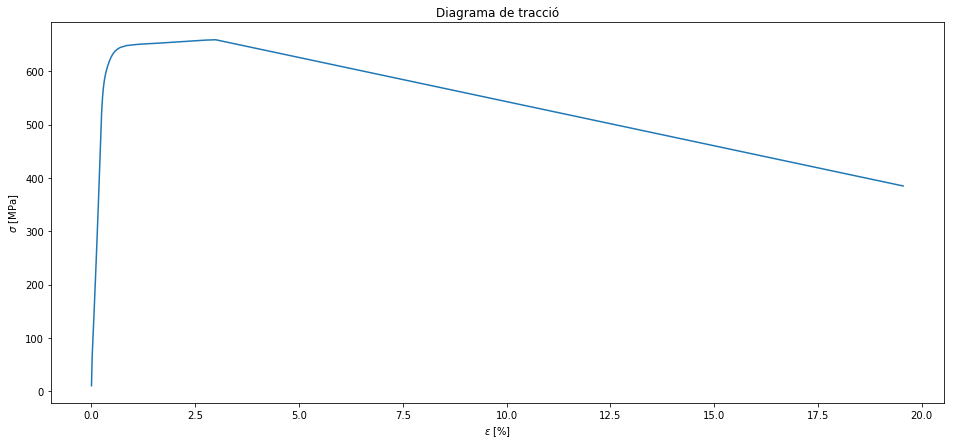

In [3]:
%matplotlib inline                               
plt.rcParams['figure.figsize'] = (16,7)           # determines the dimensions (size of the figure)
fig = plt.figure()
plt.plot(e, s)
plt.xlabel('$\epsilon$ [%]')
plt.ylabel('$\sigma$ [MPa]')
plt.title("Diagrama de tracció");

Si ens fixem en la zona elàstica, podrem fer una estimació del mòdul elàstic, agafant els punts que estan en línia recta

In [4]:
ms = linregress(e[35:102], s[35:102])
Es = ms[0]  
offset_acer = Es*(e - 0.2)
print("El Mòdul elàstic de l'acer 4142 és %d MPa" % Es )

El Mòdul elàstic de l'acer 4142 és 2022 MPa


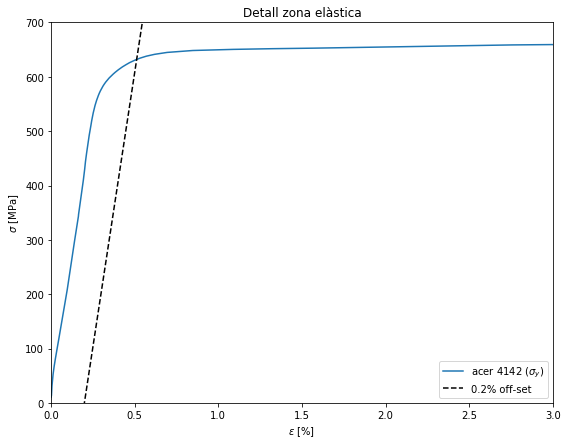

In [5]:
%matplotlib inline                                       
plt.rcParams['figure.figsize'] = (9,7)     
plt.plot(e, s)
plt.plot(e, offset_acer,'k--')
plt.xlabel('$\epsilon$ [%]')
plt.ylabel('$\sigma$ [MPa]')
plt.title("Detall zona elàstica")
plt.axis([0,3,0,700])
plt.legend(["acer 4142 ($\sigma_{y}$)","0.2% off-set"],loc='lower right');


Podeu observar que hem dibuixat una líne paral·lela a la del comportament elàstic desplaçada un 0,2 % a la dreta. Com és molt difícil saber on acaba la recta i comenza la zona no linial, s'agafa com a valor experimental del límit elàstc el punt de tall de la corba amb aquesta recta desplaçada.

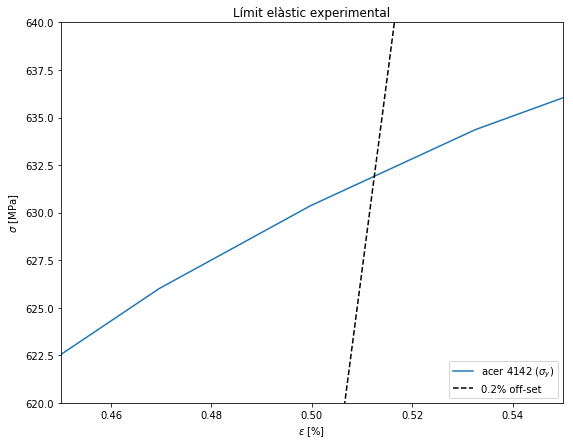

In [6]:
%matplotlib inline                             
plt.rcParams['figure.figsize'] = (9,7)     
plt.plot(e, s)
plt.plot(e, offset_acer,'k--')
plt.xlabel('$\epsilon$ [%]')
plt.ylabel('$\sigma$ [MPa]')
plt.title("Límit elàstic experimental")
plt.axis([0.45,0.55,620,640])
plt.legend(["acer 4142 ($\sigma_{y}$)","0.2% off-set"],loc='lower right');
#plt.savefig('acer_limit_elastic.png') 

podem veure que el punt de tall es troba al voltant dels  630 MPa

Amb la llibreria *holoviews* i els seus gràfics interactius podem precisar més fàcilment el punt de tall

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
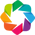

In [7]:
import holoviews as hv
hv.extension('bokeh')
import bokeh

In [8]:
curve = hv.Curve((e, s),'deformació [%]','tensió normal [MPa]')
offset_curve = hv.Curve((e, offset_acer),'deformació [%]','tensió normal [MPa]')
curve * offset_curve

:Overlay
   .Curve.I  :Curve   [deformació [%]]   (tensió normal [MPa])
   .Curve.II :Curve   [deformació [%]]   (tensió normal [MPa])

In [9]:
s_exp = 631.9
s_max = max(s)
print("L'acer 4142 té un límit elàstic de %.1f MPa i i una tensió màxima de %.1f MPa" %(s_exp, s_max))   

L'acer 4142 té un límit elàstic de 631.9 MPa i i una tensió màxima de 659.3 MPa


Una vegada que la proveta s'ha trencat a la tensió de ruptura, recupera la deormació elàstica. Per estimar la deformació plàstica que ens dona la ductibilitat del material caldrà restar la deformació elàstica amb una paral·lela a la recta elàstica. Podem fer una estimació amb un gràfic interactiu:

In [10]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(b):
    offset_acer2 = Es*(e - b)    
    plt.figure()
    plt.plot(e, s)
    plt.plot(e, offset_acer2,'k--')
    plt.xlabel('$\epsilon$ [%]')
    plt.ylabel('$\sigma$ [MPa]')
    plt.title("Detall zona elàstica")
    plt.axis([19.2,19.6,0,400])
    plt.legend(["acer 4142 ($\sigma_{y}$)","0.2% off-set"],loc='lower right');    plt.xlabel('x')
    plt.show()

interactive_plot = interactive(f, b=(19.2,19.6, 0.02))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=19.38, description='b', max=19.6, min=19.2, step=0.02), Output()), _do…

Podeu comprobar fàcilment que la deformació plàstica és d'un 19,36 %